In [479]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.tree import export_text
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, f1_score, fbeta_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
%matplotlib inline

# Pré-Processamento de Dados

### Exploração de Dados

In [480]:
heartAtk = pd.read_csv("./heart_attack_prediction_dataset.csv")
heartAtk.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [481]:
heartAtk.shape

(8763, 26)

In [482]:
heartAtk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [483]:
heartAtk.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


### Preparação dos Dados

Procedemos à remoção de colunas que introduziam redundância e irrelevância ao nosso modelo.

In [484]:
columns_to_drop=['Patient ID','Income','Country','Continent','Hemisphere','BMI','Physical Activity Days Per Week']
heartAtk_clean_version1 = heartAtk.drop(columns_to_drop,axis=1)

In [485]:
heartAtk_clean_version1.shape

(8763, 19)

In [486]:
heartAtk_clean_version1.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Triglycerides,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,417.677051,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,223.748137,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,30.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,225.500000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,417.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,612.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,800.000000,10.000000,1.000000


Testamos a presença de valores nulos no nosso dataset.

Nenhum valor nulo detetado.


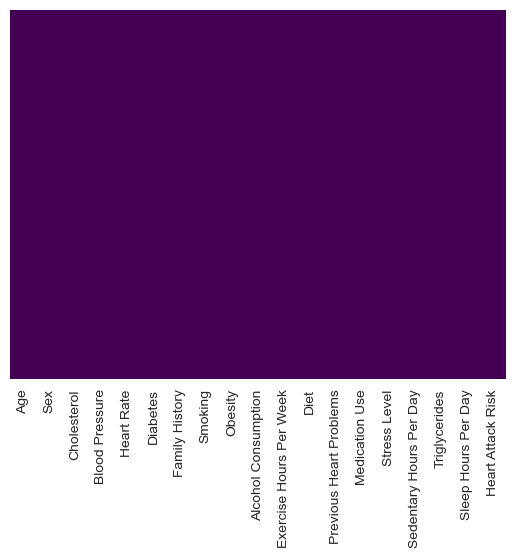

In [487]:
heartAtk_clean_version1.isna().any()
sns.heatmap(heartAtk_clean_version1.isnull(),yticklabels=False,cbar=False,cmap='viridis')
print("Nenhum valor nulo detetado.")

Testamos a presença de valores duplicados, eliminando-os.

In [488]:
heartAtk_clean_version1.duplicated().sum()
heartAtk_clean_version1.drop_duplicates(inplace=True)
heartAtk_clean_version1.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Triglycerides,Sleep Hours Per Day,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,286,6,0
1,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,235,7,0
2,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,587,4,0
3,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,378,4,0
4,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,231,5,0


***Categorização da coluna *_Blood Pressure_* por categoria***
A coluna *_Blood Pressure_* é uma variável importante que tem que ser classificada com alguns detalhes em mente.

Neste momento, os valores desta coluna estão a seguir o seguinte formato: Pressão Sistólica/Diastólica.
Assim sendo, este formato não nos é muito útil. Deste modo, recorremos a classificações categóricas, recorrendo a informações provinientes das seguintes instituições : *WHO* (*_World Health Organization_*), *_Harvard Health_* e *_American Heart Association_*.

**Normal** : menos de 120 Pressão Sistólica(mm Hg) e menos de 80 Pressão Diastólica(mm Hg).

**Elevated** : Pressão Sistólica entre 120-129 e menos de 80 Pressão Diastólica.

**High Blood Pressure (Hypertension) Stage 1** : Pressão Sistólica entre 130-139 ou Pressão Diastólica entre 80-89.

**High Blood Pressure (Hypertension) Stage 2** : 140 ou mais de Pressão Sistólica ou Pressão Diastólica a 90 ou mais.

**Hypertensive Crisis :** Pressão Sistólica a 180 ou mais e/ou Pressão Diastólica a 120 ou mais.



In [489]:
# Separamos os valores da coluna Blood Pressure em duas colunas diferentes para se poder analisar a pressão Sistólica e Diastólica mais facilmente

def string_int_systolic(string):
    parts = string.split('/')
    return int(parts[0])

def string_int_diastolic(string):
    parts = string.split('/')
    return int(parts[1])


heartAtk_clean_version2 = pd.DataFrame(heartAtk_clean_version1)
heartAtk_clean_version2['Systolic Pressure'] = heartAtk_clean_version2['Blood Pressure'].apply(string_int_systolic)
heartAtk_clean_version2['Diastolic Pressure'] = heartAtk_clean_version2['Blood Pressure'].apply(string_int_diastolic)


No entanto, estes valores têm também de ser adaptados a grupos de idades relevantes, para um tratamento de dados mais eficiente.
Grupos de idades estabelecidos : **18-39** ; **40-59**; **60+** .


In [490]:
labels = ['18-39', '40-59', '60+']
bins = [18, 39, 59, 110]

# Creating an 'Age Group' column
heartAtk_clean_version2['Age Group'] = pd.cut(heartAtk_clean_version2['Age'], bins=bins, labels=labels, right=False)

# Grouping by 'Age Group' and 'Sex'
grouped = heartAtk_clean_version2.groupby(['Age Group', 'Sex'])

age_group_1839_men = grouped.get_group(('18-39', 'Male'))
age_group_1839_women = grouped.get_group(('18-39', 'Female'))

age_group_4059_men = grouped.get_group(('40-59', 'Male'))
age_group_4059_women = grouped.get_group(('40-59', 'Female'))

age_group_60over_men = grouped.get_group(('60+', 'Male'))
age_group_60over_women = grouped.get_group(('60+', 'Female'))

age_group_1839_men.head()

C:\Users\cunha\AppData\Local\Temp\ipykernel_12800\3806848428.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = heartAtk_clean_version2.groupby(['Age Group', 'Sex'])


,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Triglycerides,Sleep Hours Per Day,Heart Attack Risk,Systolic Pressure,Diastolic Pressure,Age Group
1,21,Male,389,165/93,98,1,1,1,1,1,...,1,0,1,4.963459,235,7,0,165,93,18-39
8,20,Male,145,144/105,68,1,0,1,1,0,...,0,0,5,11.348787,790,4,0,144,105,18-39
17,38,Male,166,120/74,56,1,0,1,1,0,...,0,1,9,3.660749,402,6,0,120,74,18-39
24,36,Male,133,161/90,97,1,0,1,1,1,...,1,0,10,10.963544,605,10,0,161,90,18-39
31,25,Male,197,178/72,45,0,1,1,0,1,...,1,1,1,1.419888,661,6,0,178,72,18-39


In [491]:
mean_age39_systolic_men = age_group_1839_men['Systolic Pressure'].mean()
mean_age39_diastolic_men = age_group_1839_men['Diastolic Pressure'].mean()

mean_age39_systolic_women = age_group_1839_women['Systolic Pressure'].mean()
mean_age39_diastolic_women = age_group_1839_women['Diastolic Pressure'].mean()

mean_age59_systolic_men = age_group_4059_men['Systolic Pressure'].mean()
mean_age59_diastolic_men = age_group_4059_men['Diastolic Pressure'].mean()

mean_age59_systolic_women = age_group_4059_women['Systolic Pressure'].mean()
mean_age59_diastolic_women = age_group_4059_women['Diastolic Pressure'].mean()

mean_age60over_systolic_men = age_group_60over_men['Systolic Pressure'].mean()
mean_age60over_diastolic_men = age_group_60over_men['Diastolic Pressure'].mean()

mean_age60over_systolic_women = age_group_60over_women['Systolic Pressure'].mean()
mean_age60over_diastolic_women = age_group_60over_women['Diastolic Pressure'].mean()


print("Blood pressure means on men (age group 18-39) :\n Systolic %f ; Diastolic %f" %(mean_age39_systolic_men, mean_age39_diastolic_men) )
print("Blood pressure means on women (age group 18-39) :\n Systolic %f ; Diastolic %f\n" %(mean_age39_systolic_women, mean_age39_diastolic_women) )

print("Blood pressure means on men (age group 40-59) :\n Systolic %f ; Diastolic %f" %(mean_age59_systolic_men, mean_age59_diastolic_men) )
print("Blood pressure means on women (age group 40-59) :\n Systolic %f ; Diastolic %f\n" %(mean_age59_systolic_women, mean_age59_diastolic_women) )

print("Blood pressure means on men (age group 60+) :\n Systolic %f ; Diastolic %f" %(mean_age60over_systolic_men, mean_age60over_diastolic_men) )
print("Blood pressure means on women (age group 60+) :\n Systolic %f ; Diastolic %f\n" %(mean_age60over_systolic_women, mean_age60over_diastolic_women) )

Blood pressure means on men (age group 18-39) :
 Systolic 134.558413 ; Diastolic 84.931247
Blood pressure means on women (age group 18-39) :
 Systolic 135.510740 ; Diastolic 85.658711

Blood pressure means on men (age group 40-59) :
 Systolic 134.773538 ; Diastolic 85.468308
Blood pressure means on women (age group 40-59) :
 Systolic 135.515328 ; Diastolic 85.979562

Blood pressure means on men (age group 60+) :
 Systolic 135.363367 ; Diastolic 85.067853
Blood pressure means on women (age group 60+) :
 Systolic 135.053144 ; Diastolic 84.401240



Neste momento, as colunas *_Age_* e *_Blood Pressure_* são redundantes e portanto iremos eliminá-las.

In [492]:
columns_to_drop2 = ["Age","Blood Pressure"]
heartAtk_clean_finalVersion = heartAtk_clean_version2.drop(columns_to_drop2,axis=1)

In [493]:
heartAtk_clean_finalVersion

,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Triglycerides,Sleep Hours Per Day,Heart Attack Risk,Systolic Pressure,Diastolic Pressure,Age Group
0,Male,208,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,286,6,0,158,88,60+
1,Male,389,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,235,7,0,165,93,18-39
2,Female,324,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,587,4,0,174,99,18-39
3,Male,383,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,378,4,0,163,100,60+
4,Male,318,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,231,5,0,91,88,60+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,Male,121,61,1,1,1,0,1,7.917342,Healthy,1,1,8,10.806373,67,7,0,94,76,60+
8759,Female,120,73,1,0,0,1,0,16.558426,Healthy,0,0,8,3.833038,617,9,0,157,102,18-39
8760,Male,250,105,0,1,1,1,1,3.148438,Average,1,0,5,2.375214,527,4,1,161,75,40-59
8761,Male,178,60,1,0,1,0,0,3.789950,Unhealthy,1,1,5,0.029104,114,8,0,119,67,18-39


In [494]:
heartAtk_clean_finalVersion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Sex                      8763 non-null   object  
 1   Cholesterol              8763 non-null   int64   
 2   Heart Rate               8763 non-null   int64   
 3   Diabetes                 8763 non-null   int64   
 4   Family History           8763 non-null   int64   
 5   Smoking                  8763 non-null   int64   
 6   Obesity                  8763 non-null   int64   
 7   Alcohol Consumption      8763 non-null   int64   
 8   Exercise Hours Per Week  8763 non-null   float64 
 9   Diet                     8763 non-null   object  
 10  Previous Heart Problems  8763 non-null   int64   
 11  Medication Use           8763 non-null   int64   
 12  Stress Level             8763 non-null   int64   
 13  Sedentary Hours Per Day  8763 non-null   float64 
 14  Triglyce

Agora procederemos a categorizar certas colunas assim como codificar algumas que precisarão desse tratamento.

**Categorizar Blood Pressure** 

In [495]:
def categorize_blood_pressure(row):
    systolic = row['Systolic Pressure']
    diastolic = row['Diastolic Pressure']
    if (systolic<120) and (diastolic<80):
        return int(0) #Normal blood pressure
    elif (120<=systolic<=129) and (diastolic<80):
        return int(1) #Elevated blood pressure
    elif (130<=systolic<=139) or (80<=diastolic<=89):
        return int(2) #High blood pressure -> Hypertension Stage 1
    elif (systolic>=140) or (diastolic>=90):
        return int(3) #High blood pressure -> Hypertension Stage 2
    else:
        return int(4) #Hypertensive Crisis

heartAtk_clean_finalVersion['Blood Pressure'] = heartAtk_clean_finalVersion.apply(categorize_blood_pressure, axis=1)
heartAtk_clean_finalVersion = heartAtk_clean_finalVersion.drop(['Systolic Pressure','Diastolic Pressure'],axis=1)

**Categorizar Cholesterol**

In [496]:
def categorize_cholesterol(row):
    chol = row['Cholesterol']
    if chol < 200:
        return int(0) #Desirable
    elif 200 <= chol <= 239:
        return int(1) #Borderline High
    else:
        return int(2) #High

heartAtk_clean_finalVersion['Cholesterol'] = heartAtk_clean_finalVersion.apply(categorize_cholesterol, axis=1)

**Categorizar Heart Rate**

In [497]:
def categorize_heartRate(row):
    hr = row['Heart Rate']
    s = row['Sex']
    a = row['Age Group']
    if (a=='18-39'):
        if(s=='Male'):
            if(hr<=70):
                return int(0) #Above Average or better
            elif(71<=hr<=74):
                return int(1) #Average
            elif(75<=hr<=81):
                return int(2) #Below Average
            else:
                return int(3) #Poor
        else:
            if(hr<=73):
                return int(0) #Above Average or better
            elif(74<=hr<=78):
                return int(1) #Average
            elif(79<=hr<=84):
                return int(2) #Below Average
            else:
                return int(3) #Poor
            
    elif (a=='40-59'):
        if(s=='Male'):
            if(hr<=71):
                return int(0) #Above Average or better
            elif(72<=hr<=76):
                return int(1) #Average
            elif(77<=hr<=83):
                return int(2) #Below Average
            else:
                return int(3) #Poor
        else:
            if(hr<=73):
                return int(0) #Above Average or better
            elif(74<=hr<=78):
                return int(1) #Average
            elif(79<=hr<=83):
                return int(2) #Below Average
            else:
                return int(3) #Poor
            
    else:
        if(s=='Male'):
            if(hr<=71):
                return int(0) #Above Average or better
            elif(72<=hr<=75):
                return int(1) #Average
            elif(76<=hr<=81):
                return int(2) #Below Average
            else:
                return int(3) #Poor
        else:
            if(hr<=73):
                return int(0) #Above Average or better
            elif(74<=hr<=77):
                return int(1) #Average
            elif(78<=hr<=84):
                return int(2) #Below Average
            else:
                return int(3) #Poor



heartAtk_clean_finalVersion['Heart Rate'] = heartAtk_clean_finalVersion.apply(categorize_heartRate, axis=1)

**Categorizar Sedentary Behaviour**

In [498]:
def categorize_sedentary(row):
    sed = row['Sedentary Hours Per Day']
    if sed > 6 :
        return int(1) #Sedentary Person
    else:
        return int(0) #Not considered sedentary
    
    
heartAtk_clean_finalVersion['Sedentary Hours Per Day'] = heartAtk_clean_finalVersion.apply(categorize_sedentary,axis=1)
heartAtk_clean_finalVersion.rename(columns={'Sedentary Hours Per Day': 'Sedentary Behaviour'}, inplace=True)

**Categorizar Exercising Hours**

In [499]:
def categorize_exercise(row):
    eer = row['Exercise Hours Per Week']
    if eer > 2.5 :
        return int(0) #Enough hours of exercise per week
    else:
        return int(1) #Doesn't reach the weekly exercise quota to be considered healthy
    
    
heartAtk_clean_finalVersion['Exercise Hours Per Week'] = heartAtk_clean_finalVersion.apply(categorize_exercise,axis=1)
heartAtk_clean_finalVersion.rename(columns={'Exercise Hours Per Week': 'Enough Exercise'}, inplace=True)

**Categorizar Triglycerides**

In [500]:
def categorize_trig(row):
    eer = row['Triglycerides']
    if eer > 150 :
        return int(1) #Unhealthy levels 
    else:
        return int(0) #Healthy levels
    
heartAtk_clean_finalVersion['Triglycerides'] = heartAtk_clean_finalVersion.apply(categorize_trig,axis=1)
heartAtk_clean_finalVersion.rename(columns={'Triglycerides': 'Triglycerides Levels'}, inplace=True)

**Categorizar Sleep**

In [501]:
def categorize_sleep(row):
    sleep = row['Sleep Hours Per Day']
    if sleep >= 7.0 and sleep <= 9.0:
        return int(0) #Enough sleep
    else:
        return int(1) #Unhealthy sleeping habits
    
heartAtk_clean_finalVersion['Sleep Hours Per Day'] = heartAtk_clean_finalVersion.apply(categorize_sleep,axis=1)
heartAtk_clean_finalVersion.rename(columns={'Sleep Hours Per Day': 'Enough Sleep'}, inplace=True)

**Hot Encoding Sex, Diet e Age Groups**

In [502]:
heartAtk_clean_finalVersion= pd.get_dummies(heartAtk_clean_finalVersion, columns=['Sex'], prefix='Sex')
heartAtk_clean_finalVersion['Sex_Female']= heartAtk_clean_finalVersion['Sex_Female'].astype(int)
heartAtk_clean_finalVersion['Sex_Male']= heartAtk_clean_finalVersion['Sex_Male'].astype(int)

heartAtk_clean_finalVersion= pd.get_dummies(heartAtk_clean_finalVersion, columns=['Diet'], prefix='Diet')
heartAtk_clean_finalVersion['Diet_Unhealthy']= heartAtk_clean_finalVersion['Diet_Unhealthy'].astype(int)
heartAtk_clean_finalVersion['Diet_Average']= heartAtk_clean_finalVersion['Diet_Average'].astype(int)
heartAtk_clean_finalVersion['Diet_Healthy']= heartAtk_clean_finalVersion['Diet_Healthy'].astype(int)

heartAtk_clean_finalVersion= pd.get_dummies(heartAtk_clean_finalVersion, columns=['Age Group'], prefix='AgeGroup')
heartAtk_clean_finalVersion['AgeGroup_18-39'] = heartAtk_clean_finalVersion['AgeGroup_18-39'].astype(int)
heartAtk_clean_finalVersion['AgeGroup_40-59'] = heartAtk_clean_finalVersion['AgeGroup_40-59'].astype(int)
heartAtk_clean_finalVersion['AgeGroup_60+'] = heartAtk_clean_finalVersion['AgeGroup_60+'].astype(int)

In [503]:
heartAtk_clean_finalVersion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Cholesterol              8763 non-null   int64
 1   Heart Rate               8763 non-null   int64
 2   Diabetes                 8763 non-null   int64
 3   Family History           8763 non-null   int64
 4   Smoking                  8763 non-null   int64
 5   Obesity                  8763 non-null   int64
 6   Alcohol Consumption      8763 non-null   int64
 7   Enough Exercise          8763 non-null   int64
 8   Previous Heart Problems  8763 non-null   int64
 9   Medication Use           8763 non-null   int64
 10  Stress Level             8763 non-null   int64
 11  Sedentary Behaviour      8763 non-null   int64
 12  Triglycerides Levels     8763 non-null   int64
 13  Sleeping Habits          8763 non-null   int64
 14  Heart Attack Risk        8763 non-null   int64
 15  Bloo

In [504]:
heartAtk_clean_finalVersion

,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Enough Exercise,Previous Heart Problems,Medication Use,...,Heart Attack Risk,Blood Pressure,Sex_Female,Sex_Male,Diet_Average,Diet_Healthy,Diet_Unhealthy,AgeGroup_18-39,AgeGroup_40-59,AgeGroup_60+
0,1,1,0,0,1,0,0,1,0,0,...,0,2,0,1,1,0,0,0,0,1
1,2,3,1,1,1,1,1,0,1,0,...,0,3,0,1,0,0,1,1,0,0
2,2,0,1,0,0,0,0,0,1,1,...,0,3,1,0,0,1,0,1,0,0
3,2,1,1,1,1,0,1,1,1,0,...,0,3,0,1,1,0,0,0,0,1
4,2,3,1,1,1,1,0,1,1,0,...,0,2,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,0,0,1,1,1,0,1,1,1,1,...,0,0,0,1,0,1,0,0,0,1
8759,0,0,1,0,0,1,0,1,0,0,...,0,3,1,0,0,1,0,1,0,0
8760,2,3,0,1,1,1,1,1,1,0,...,1,3,0,1,1,0,0,0,1,0
8761,0,0,1,0,1,0,0,1,1,1,...,0,0,0,1,0,0,1,1,0,0


**Análise Multivariável**

<Axes: >

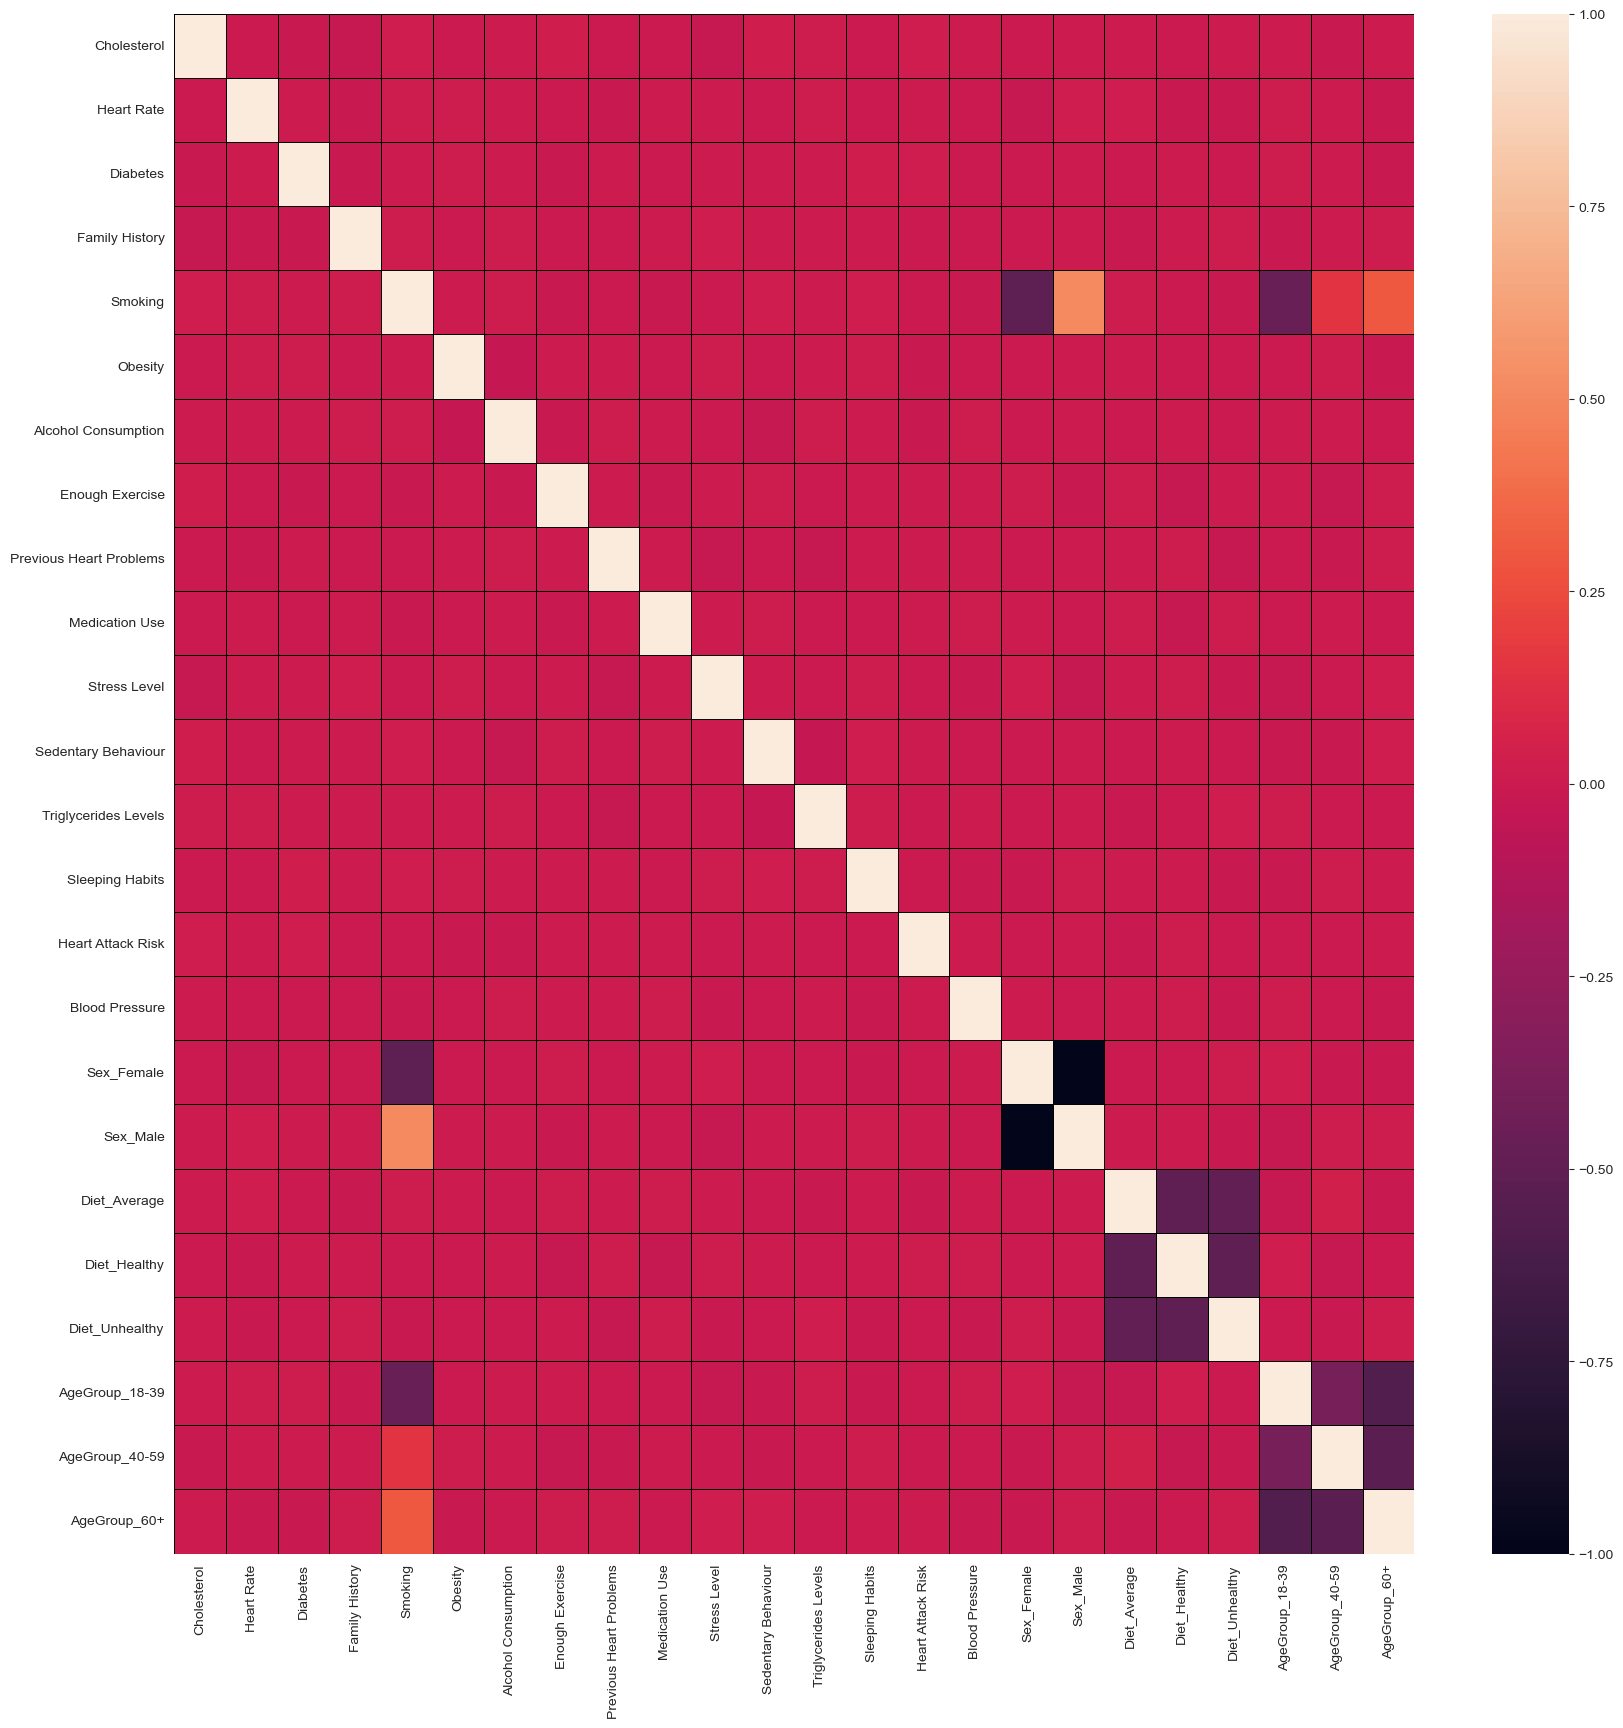

In [505]:

fig = plt.figure(figsize=(20,20))
correlation_matrix = heartAtk_clean_finalVersion.corr(method="pearson")
sns.heatmap(correlation_matrix, linecolor='black', linewidths=0.5)

**Pré Processamento de Dados: completo.**

# Análise de Dados

O nosso objetivo com este dataset foi prever o risco de ataque cardíacos. Trata-se de um problema binário e portanto a primeira opção para obter o nosso modelo foi recorrer ao método de *_Decision Tree Classifier_*.



## Decision Tree Classifier Method

*_Decision Tree Classifier_* é um algoritmo de *_machine learning_* supervisionado que é usado para classificação e/ou regressão de *_datasets_*. Este método funciona dividindo os dados do *_dataset_* em subconjuntos menores com base em decisões sobre os valores das colunas. Essas decisões formam uma estrutura de árvore onde os ramos representam as condições de decisão e as folhas representam as classes ou valores previstos. Este método é popular pela simplicidade de interpretação que fornece assim como pela maneira que consegue processar relações entre *_features_* quer sejam estas lineares ou não. Adicionalmente, este método é bastante versátil e implementa uma leve importância nas *_features_*, podendo depois identificar-se mais facilmente aquelas que contribuiram mais ao processo de decisão que levaram ao modelo.

In [506]:
x = heartAtk_clean_finalVersion.drop(['Heart Attack Risk'], axis = 1)
y = heartAtk_clean_finalVersion['Heart Attack Risk']

# Creating testing data and training data.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=2022)

**Hold-Out Validation**

In [507]:
#Instance of the Decision Tree
dtc_model = DecisionTreeClassifier(random_state=2022)

#Begin training
dtc_model.fit(x_train, y_train)

# Predictions for the function
dtree_predictions = dtc_model.predict(x_test)

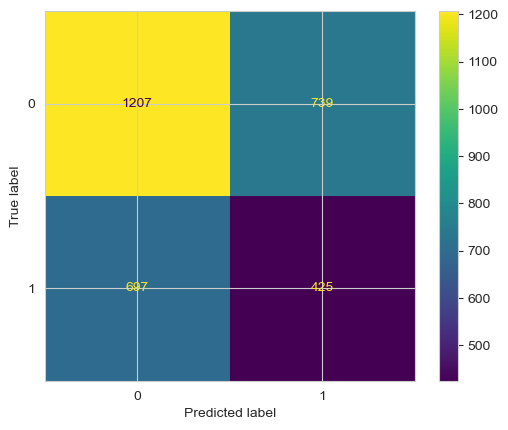

In [508]:
# And now for the Quality Metrics

# Confusion Matrix

ConfusionMatrixDisplay.from_predictions(y_test, dtree_predictions)

In [509]:
accuracy = accuracy_score(y_test, dtree_predictions)
print("Accuracy Score: %s" %accuracy)
precision = precision_score(y_test, dtree_predictions)
print("Precision Score: %s" %precision)
recall = recall_score(y_test, dtree_predictions)
print("Recall Score: %s" %recall)

Accuracy Score: 0.5319426336375489
Precision Score: 0.3651202749140893
Recall Score: 0.3787878787878788


ROC and AUC Score: 0.499517269301442


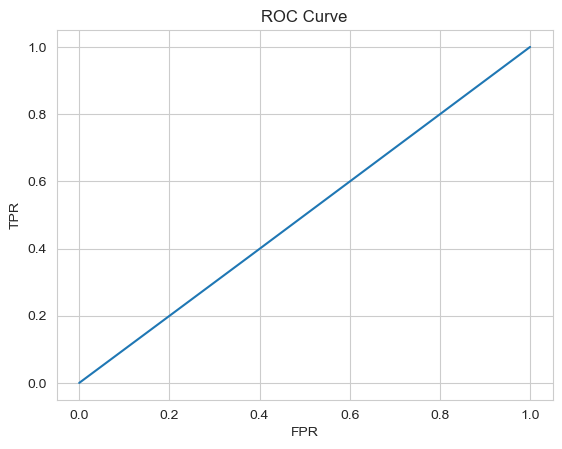

In [510]:
roc_auc = roc_auc_score(y_test,dtree_predictions)
print("ROC and AUC Score: %s" %roc_auc)

fpr, tpr, _ = roc_curve(y_test, dtree_predictions)
plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.show()

In [511]:
f1 = f1_score(y_test, dtree_predictions)
fbeta = fbeta_score(y_test, dtree_predictions, beta=0.5)

print("F1 Score: %s" %f1)
print("FBeta Score: %s" %fbeta)

F1 Score: 0.3718285214348207
FBeta Score: 0.3677743163724472


In [512]:
tree_structure = export_text(dtc_model, feature_names=list(x.columns))
print(tree_structure)


|--- Stress Level <= 7.50
|   |--- Previous Heart Problems <= 0.50
|   |   |--- AgeGroup_40-59 <= 0.50
|   |   |   |--- Diet_Average <= 0.50
|   |   |   |   |--- Sedentary Behaviour <= 0.50
|   |   |   |   |   |--- Cholesterol <= 0.50
|   |   |   |   |   |   |--- Alcohol Consumption <= 0.50
|   |   |   |   |   |   |   |--- Stress Level <= 5.50
|   |   |   |   |   |   |   |   |--- Stress Level <= 4.50
|   |   |   |   |   |   |   |   |   |--- Blood Pressure <= 2.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Blood Pressure >  2.50
|   |   |   |   |   |   |   |   |   |   |--- Sex_Male <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- Sex_Male >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |--- Stress Level >  4.50
|   |   |   |   |   |   |   |   |   |--- Diet_Healthy <= 0.50
|   |   |   |   

**Cross Validation(k = 10)**

In [513]:
# And now for the Module Validation

dtccv_model = DecisionTreeClassifier(criterion = "entropy", max_depth=10, random_state=2022)
dtccv_model.fit(x_train, y_train)
scores = cross_val_score(dtccv_model,x,y,cv = 10)
print(scores)
print("Accuracy of %0.2f with a standard deviation of %0.2f" %(scores.mean(), scores.std()))

[0.59749145 0.55530217 0.57582668 0.55707763 0.59018265 0.59360731
 0.56278539 0.56506849 0.57305936 0.58447489]
Accuracy of 0.58 with a standard deviation of 0.01


In [514]:
tree_structure2 = export_text(dtccv_model, feature_names=list(x.columns))
print(tree_structure2)


|--- Stress Level <= 7.50
|   |--- Previous Heart Problems <= 0.50
|   |   |--- AgeGroup_40-59 <= 0.50
|   |   |   |--- Diet_Average <= 0.50
|   |   |   |   |--- Sedentary Behaviour <= 0.50
|   |   |   |   |   |--- Cholesterol <= 0.50
|   |   |   |   |   |   |--- Alcohol Consumption <= 0.50
|   |   |   |   |   |   |   |--- Triglycerides Levels <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Triglycerides Levels >  0.50
|   |   |   |   |   |   |   |   |--- Heart Rate <= 0.50
|   |   |   |   |   |   |   |   |   |--- Stress Level <= 5.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Stress Level >  5.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Heart Rate >  0.50
|   |   |   |   |   |   |   |   |   |--- Heart Rate <= 2.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- Heart Rate >  2.50
|   |   |   |   |   

## Support Vector Classifier (SVC)

Support Vector Classifier (SVC) é um algoritmo de *_machine learning_* algorithm com o objetivo de encontrar um hiperplano ótimo para separação de classes. Destaca-se em tarefas de classificação lineares e não lineares, identificando vetores de suporte críticos para determinar decisões. No entanto, o relatório de classificação apresentado indica desafios para o SVC, especialmente na obtenção de alta precisão e recall para ambas as classes, sugerindo áreas potenciais para otimização ou consideração de algoritmos alternativos.

c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Heart Attack Risk', ylabel='count'>

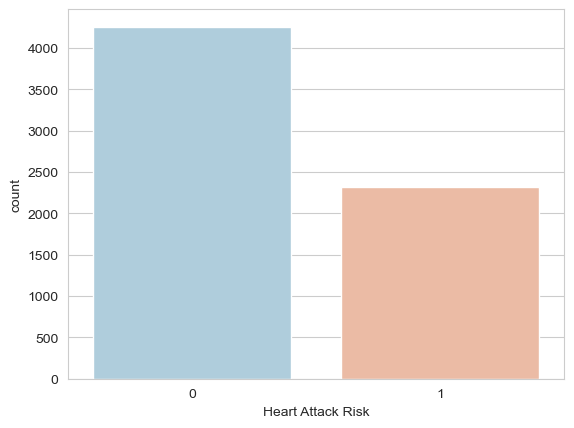

In [515]:
x = heartAtk_clean_finalVersion.drop(['Heart Attack Risk'], axis = 1)
y = heartAtk_clean_finalVersion['Heart Attack Risk']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=2022)

sns.set_style('whitegrid')
sns.countplot(x='Heart Attack Risk', data = pd.DataFrame(y_train,columns=['Heart Attack Risk']), palette='RdBu_r')

c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Heart Attack Risk', ylabel='count'>

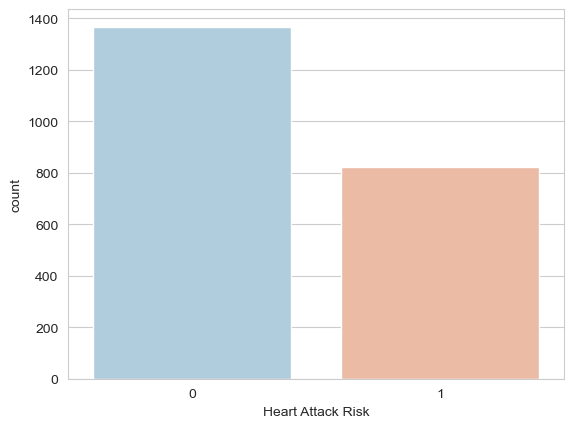

In [516]:
sns.countplot(x='Heart Attack Risk', data = pd.DataFrame(y_test,columns=['Heart Attack Risk']),palette='RdBu_r')

In [517]:
class_distribution = y.value_counts()
print(class_distribution)

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64


**10-Fold Cross Validation**

In [518]:
cross_valid_modelo = SVC(random_state=2022)
scores = cross_val_score(cross_valid_modelo,x,y,cv=10)
scores

array([0.64196123, 0.64196123, 0.64196123, 0.64269406, 0.64155251,
       0.64155251, 0.64155251, 0.64155251, 0.64155251, 0.64155251])

In [519]:
print("%0.2f accuracy with a standard deviation of %0.4f" % (scores.mean(),scores.std()))

0.64 accuracy with a standard deviation of 0.0004


In [520]:
svcmodel = SVC(random_state=2022, class_weight='balanced')
svcmodel.fit(x_train,y_train)

SVC(class_weight='balanced', random_state=2022)

In [521]:
svc_predictions = svcmodel.predict(x_test)
print("%0.2f accuracy" % (accuracy_score(y_test,svc_predictions)))

0.48 accuracy


In [522]:
print(classification_report(y_test,svc_predictions))

              precision    recall  f1-score   support

           0       0.62      0.43      0.51      1368
           1       0.37      0.55      0.44       823

    accuracy                           0.48      2191
   macro avg       0.49      0.49      0.48      2191
weighted avg       0.52      0.48      0.48      2191



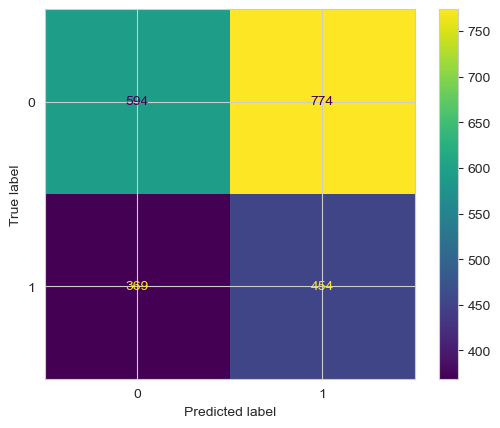

In [523]:
ConfusionMatrixDisplay.from_predictions(y_test,svc_predictions)
plt.show()

Precisão e Recall para a Classe 0:
- **Precisão** (proporção de verdadeiros positivos entre todos os resultados previstos positivos) para a classe 0 foi média (0.62), ou seja, quando o modelo prevê instâncias para a classe 0, faz estas corretamente cerca de 61%  das vezes.
- **Recall** (proporção de verdadeiros positivos entre todos os resultados verdadeiramente positivos) para a classe 0 foi relativamente baixo (0.43), ou seja, quando o modelo prevê instâncias para a classe 0, faz estas corretamente cerca de 43%  das vezes.

Precisão e Recall para a Classe 1:
- **Precisão** (proporção de verdadeiros negativos entre todos os resultados previstos negativos) para a classe 1 foi relativamente baixa (0.37), ou seja, quando o modelo prevê instâncias para a classe 1, faz estas corretamente cerca de 37%  das vezes.
- **Recall** (proporção de verdadeiros negativos entre todos os resultados verdadeiramente negativos) para a classe 1 foi média (0.55), ou seja, quando o modelo prevê instâncias para a classe 1, faz estas corretamente cerca de 55%  das vezes.

----------------------------------------------

## GridSearchCV

In [524]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': [ 'rbf']
              }


grid = GridSearchCV(SVC(random_state=2022, class_weight='balanced'),param_grid,refit=True,verbose=3)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.648 total time=   2.6s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.353 total time=   2.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.648 total time=   2.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.648 total time=   2.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.648 total time=   2.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.472 total time=   2.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.518 total time=   2.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.495 total time=   2.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.429 total time=   3.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.488 total time=   2.8s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.456 total time=   2.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(class_weight='balanced', random_state=2022),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [525]:
grid.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [526]:
grid.best_estimator_

SVC(C=10, class_weight='balanced', gamma=1, random_state=2022)

In [527]:
grid_predictions = grid.predict(x_test)
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.62      0.95      0.75      1368
           1       0.35      0.04      0.08       823

    accuracy                           0.61      2191
   macro avg       0.49      0.50      0.41      2191
weighted avg       0.52      0.61      0.50      2191



In [528]:
print("%0.2f accuracy" % (accuracy_score(y_test,grid_predictions)))

0.61 accuracy


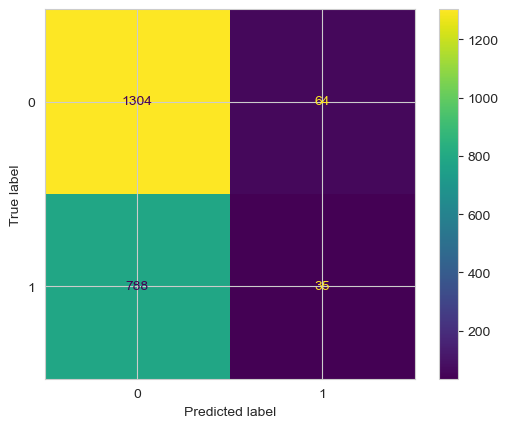

In [529]:
ConfusionMatrixDisplay.from_predictions(y_test,grid_predictions)
plt.show()

Precisão e Recall para a Classe 0:
- **Precisão** (proporção de verdadeiros positivos entre todos os resultados previstos positivos) para a classe 0 foi média (0.62), ou seja, quando o modelo prevê instâncias para a classe 0, faz estas corretamente cerca de 62%  das vezes.
- **Recall** (proporção de verdadeiros positivos entre todos os resultados verdadeiramente positivos) para a classe 0 foi muito alta (0.95), ou seja, quando o modelo prevê instâncias para a classe 0, faz estas corretamente cerca de 95%  das vezes.

Precisão e Recall para a Classe 1:
- **Precisão** (proporção de verdadeiros negativos entre todos os resultados previstos negativos) para a classe 1 foi relativamente baixa (0.35), ou seja, quando o modelo prevê instâncias para a classe 1, faz estas corretamente cerca de 35%  das vezes.
- **Recall** (proporção de verdadeiros negativos entre todos os resultados verdadeiramente negativos) para a classe 1 foi muito baixa (0.04), ou seja, quando o modelo prevê instâncias para a classe 1, faz estas corretamente cerca de 4%  das vezes.

-------------------------------------------------------------------------------------------

## GridSearch com Random Forest Classifier

In [530]:
gs_model = RandomForestClassifier(class_weight='balanced', random_state=2023)
gs_model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=2023)

In [531]:
gs_predictions = gs_model.predict(x_test)

In [532]:
print("Classification Report:")
print(classification_report(y_test, gs_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.91      0.74      1368
           1       0.34      0.08      0.13       823

    accuracy                           0.60      2191
   macro avg       0.48      0.49      0.43      2191
weighted avg       0.52      0.60      0.51      2191



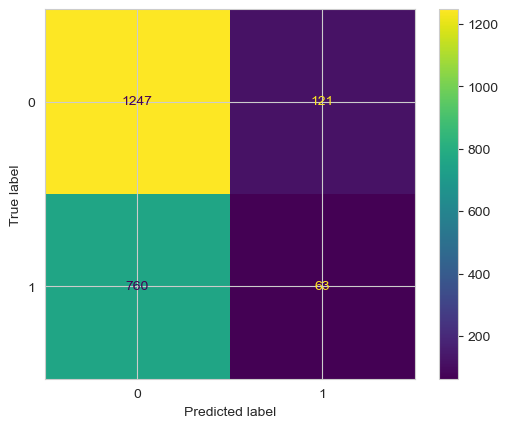

In [533]:
ConfusionMatrixDisplay.from_estimator(gs_model, x_test, y_test, display_labels=y.unique())
plt.show()

Precisão e Recall para a Classe 0:
- **Precisão** (proporção de verdadeiros positivos entre todos os resultados previstos positivos) para a classe 0 foi média (0.62), ou seja, quando o modelo prevê instâncias para a classe 0, faz estas corretamente cerca de 62%  das vezes.
- **Recall** (proporção de verdadeiros positivos entre todos os resultados verdadeiramente positivos) para a classe 0 foi muito alta (0.91), ou seja, quando o modelo prevê instâncias para a classe 0, faz estas corretamente cerca de 91%  das vezes.

Precisão e Recall para a Classe 1:
- **Precisão** (proporção de verdadeiros negativos entre todos os resultados previstos negativos) para a classe 1 foi relativamente baixa (0.34), ou seja, quando o modelo prevê instâncias para a classe 1, faz estas corretamente cerca de 34%  das vezes.
- **Recall** (proporção de verdadeiros negativos entre todos os resultados verdadeiramente negativos) para a classe 1 foi muito baixa (0.08), ou seja, quando o modelo prevê instâncias para a classe 1, faz estas corretamente cerca de 8%  das vezes.

---------------------------------------------------------------------------------------------------------------------------------------------------------

**Logistic Regression Method**

In [534]:
x = heartAtk_clean_finalVersion.drop('Heart Attack Risk',axis=1)
y = heartAtk_clean_finalVersion['Heart Attack Risk']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=101)

c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Heart Attack Risk', ylabel='count'>

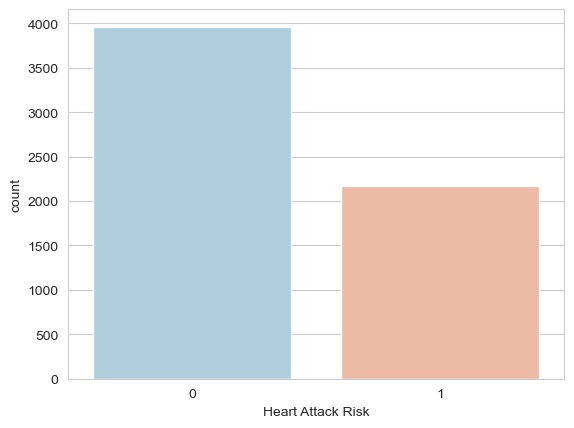

In [535]:
sns.set_style('whitegrid')
sns.countplot(x='Heart Attack Risk', data = pd.DataFrame(y_train,columns=['Heart Attack Risk']),palette='RdBu_r')

c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cunha\miniconda3\envs\DAApls\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Heart Attack Risk', ylabel='count'>

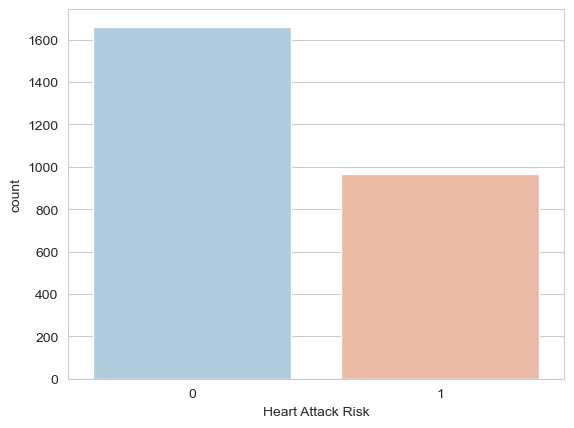

In [536]:
sns.set_style('whitegrid')
sns.countplot(x='Heart Attack Risk', data = pd.DataFrame(y_test,columns=['Heart Attack Risk']),palette='RdBu_r')

In [537]:
starttime = time.process_time()

logisticModel1 = LogisticRegression(random_state=2022, solver='newton-cg')
print(logisticModel1)
logisticModel1.fit(x_train,y_train)

endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")

predictionsLogisticModel1 = logisticModel1.predict(x_test)

LogisticRegression(random_state=2022, solver='newton-cg')
Time spent: 0.234375 seconds


In [538]:
starttime = time.process_time()

logisticModel2 = LogisticRegression(random_state=2022, solver='liblinear')
print(logisticModel1)
logisticModel2.fit(x_train,y_train)

endtime = time.process_time()
print(f"Time spent: {endtime - starttime} seconds")

predictionsLogisticModel2 = logisticModel2.predict(x_test)

LogisticRegression(random_state=2022, solver='newton-cg')
Time spent: 0.125 seconds


In [539]:
print("With solver 'newton-cgs' : \n",classification_report(y_test,predictionsLogisticModel1,zero_division=1))
print("With solver 'liblinear' : \n",classification_report(y_test,predictionsLogisticModel2,zero_division=1))

With solver 'newton-cgs' : 
               precision    recall  f1-score   support

           0       0.63      1.00      0.77      1661
           1       1.00      0.00      0.00       968

    accuracy                           0.63      2629
   macro avg       0.82      0.50      0.39      2629
weighted avg       0.77      0.63      0.49      2629

With solver 'liblinear' : 
               precision    recall  f1-score   support

           0       0.63      1.00      0.77      1661
           1       1.00      0.00      0.00       968

    accuracy                           0.63      2629
   macro avg       0.82      0.50      0.39      2629
weighted avg       0.77      0.63      0.49      2629



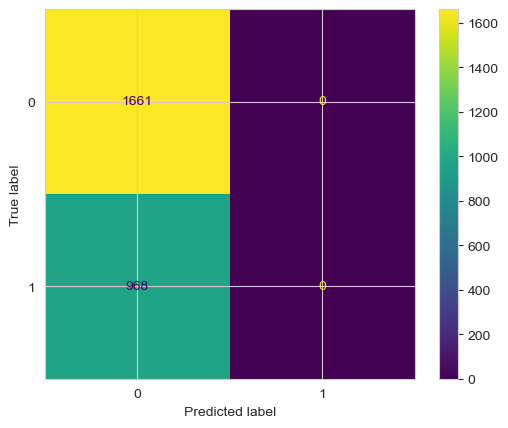

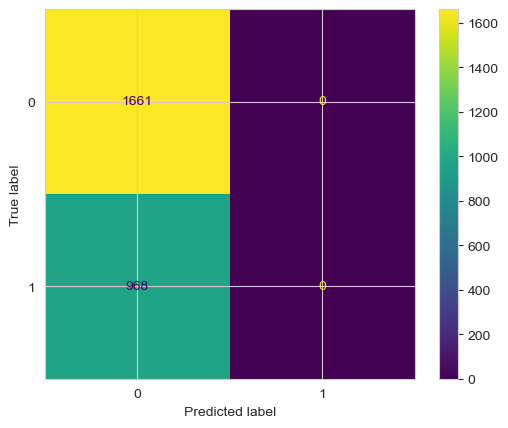

In [540]:
# These confusion matrixes are...confusing. I don't understand how this is happening. We will need to look into it.

ConfusionMatrixDisplay.from_predictions(y_test,predictionsLogisticModel1)
ConfusionMatrixDisplay.from_predictions(y_test,predictionsLogisticModel2)
plt.show()